# CART with original cleaned dataset

In [ ]:
install.packages('Metrics') 
install.packages('rpart.plot')
install.packages("caTools")
install.packages("data.table")
install.packages('bit64')

In [96]:
library(data.table)
library(rpart)
library(rpart.plot) 
library(caTools)
library('Metrics')

In [97]:
setwd('C:\\Users\\YI XUAN\\Desktop\\NTU\\AY2021-2022 SEM 1\\BC2406 Analytics I - Visual & Predictive Techniques\\AY21 Team Assignment and Project\\Sem09 Team06\\Notebooks datasets dictonary\\Noteb datasets dict')
asia_dataset_cleaned <- fread('final_asia_dataset_cleaned.csv')

In [98]:
summary(asia_dataset_cleaned)

  Countries              Year        GDP_Growth       Market_Size    
 Length:150         Min.   :2010   Min.   :-0.1154   Min.   :  2439  
 Class :character   1st Qu.:2012   1st Qu.: 3.3457   1st Qu.:  5313  
 Mode  :character   Median :2014   Median : 5.2443   Median : 11227  
                    Mean   :2014   Mean   : 5.0493   Mean   : 21163  
                    3rd Qu.:2017   3rd Qu.: 6.7503   3rd Qu.: 32917  
                    Max.   :2019   Max.   :14.5256   Max.   :102573  
                                                                     
    Life_Exp     Mean_Years_of_Schooling Internet_Penetration Gov_Indicator    
 Min.   :63.52   Min.   : 4.100          Min.   : 0.25        Min.   :-1.6733  
 1st Qu.:70.20   1st Qu.: 6.500          1st Qu.:14.90        1st Qu.:-0.5788  
 Median :75.09   Median : 8.100          Median :41.00        Median :-0.3735  
 Mean   :74.71   Mean   : 8.752          Mean   :45.26        Mean   : 0.1507  
 3rd Qu.:81.09   3rd Qu.:11.100         

In [99]:
# Train-Test split

set.seed(2014)

trainasia <- sample.split(Y = asia_dataset_cleaned$GDP_Growth, SplitRatio = 0.70)

trainsetasia <- subset(asia_dataset_cleaned, trainasia == T)

testsetasia <- subset(asia_dataset_cleaned, trainasia == F)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

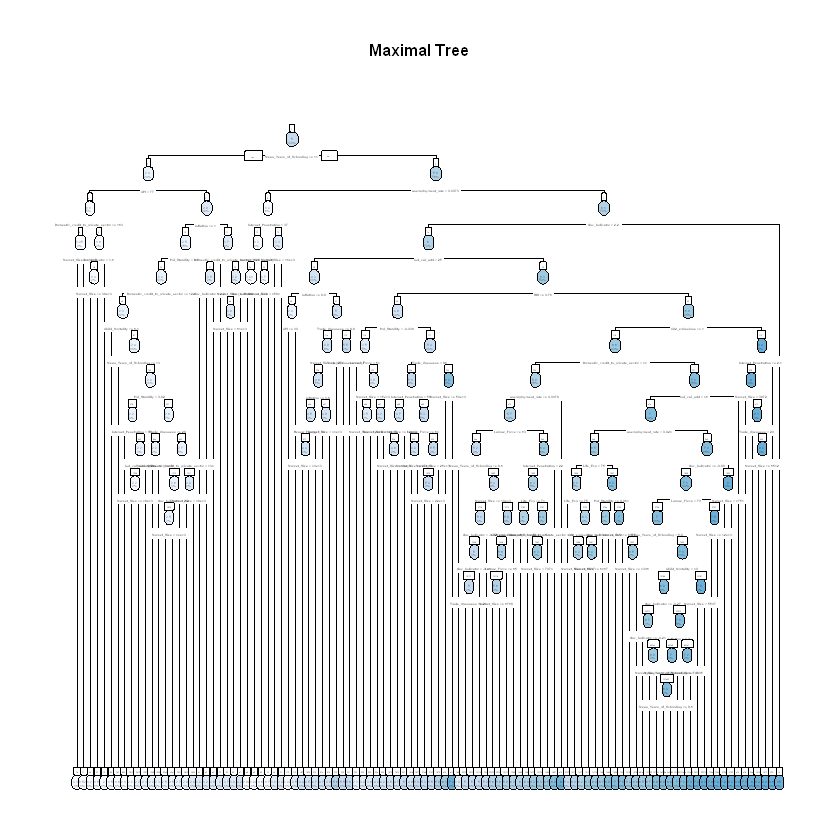

In [100]:
# Training the model
cartmaxasia <- rpart(GDP_Growth ~ .-Countries - Year, data = trainsetasia, method = 'anova',
                     control = rpart.control(minsplit = 2, cp = 0))

# Grow to max tree
rpart.plot(cartmaxasia, nn= T, main = "Maximal Tree")

In [101]:
# View how the tree performs 
printcp(cartmaxasia)


Regression tree:
rpart(formula = GDP_Growth ~ . - Countries - Year, data = trainsetasia, 
    method = "anova", control = rpart.control(minsplit = 2, cp = 0))

Variables actually used in tree construction:
 [1] Child_Mortality                   CO2_emissions                    
 [3] CPI                               Domestic_credit_to_private_sector
 [5] Gov_Indicator                     HDI                              
 [7] ind_val_add                       inflation                        
 [9] Internet_Penetration              Labour_Force                     
[11] Life_Exp                          Market_Size                      
[13] Mean_Years_of_Schooling           Pol_Stability                    
[15] Renew_Energy                      Trade_Openness                   
[17] unemployment_rate                

Root node error: 598.52/105 = 5.7002

n= 105 

            CP nsplit  rel error  xerror    xstd
1   3.5700e-01      0 1.0000e+00 1.01050 0.16958
2   1.6039e-01      1 6.

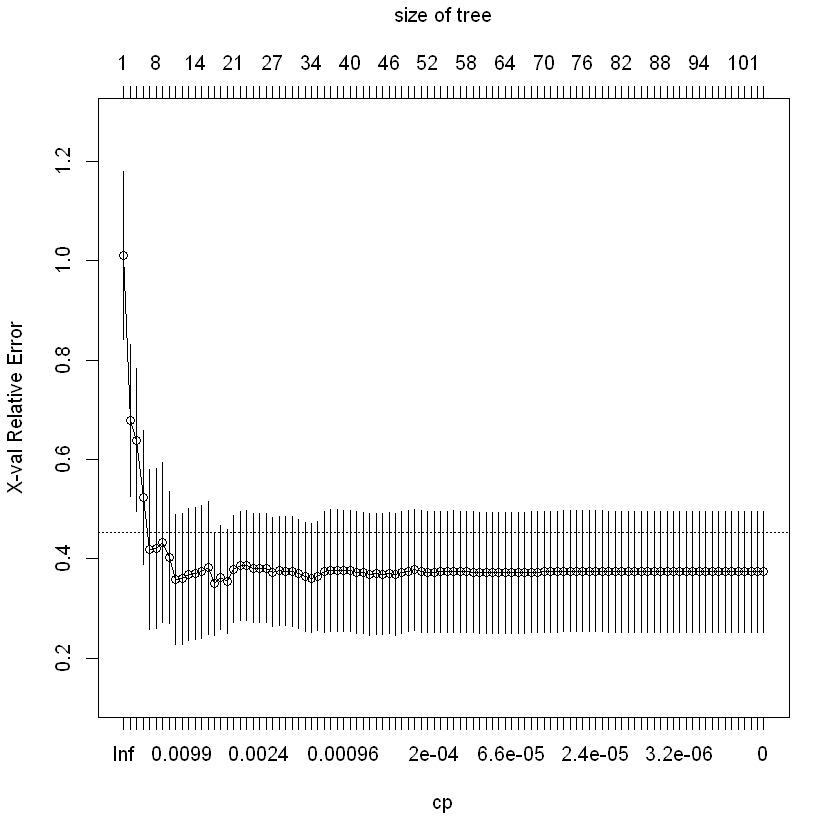

In [102]:
# Visual representation of cross-validated error summary
plotcp(cartmaxasia)

In [103]:
# Automatic method to find optimal CP 
CVerror.cap <- cartmaxasia$cptable[which.min(cartmaxasia$cptable[,"xerror"]), "xerror"] + cartmaxasia$cptable[which.min(cartmaxasia$cptable[,"xerror"]), "xstd"]

# Find the optimal CP region whose CV error is just below CVerror.cap in maximal tree m1.
i <- 1; j<- 4
while (cartmaxasia$cptable[i,j] > CVerror.cap) {
  i <- i + 1
}

# Get geometric mean of the two identified CP values in the optimal region if optimal tree has at least one split.
cp.opt = ifelse(i > 1, sqrt(cartmaxasia$cptable[i,1] * cartmaxasia$cptable[i-1,1]), 1)
cp.opt

[1] 0.04075956

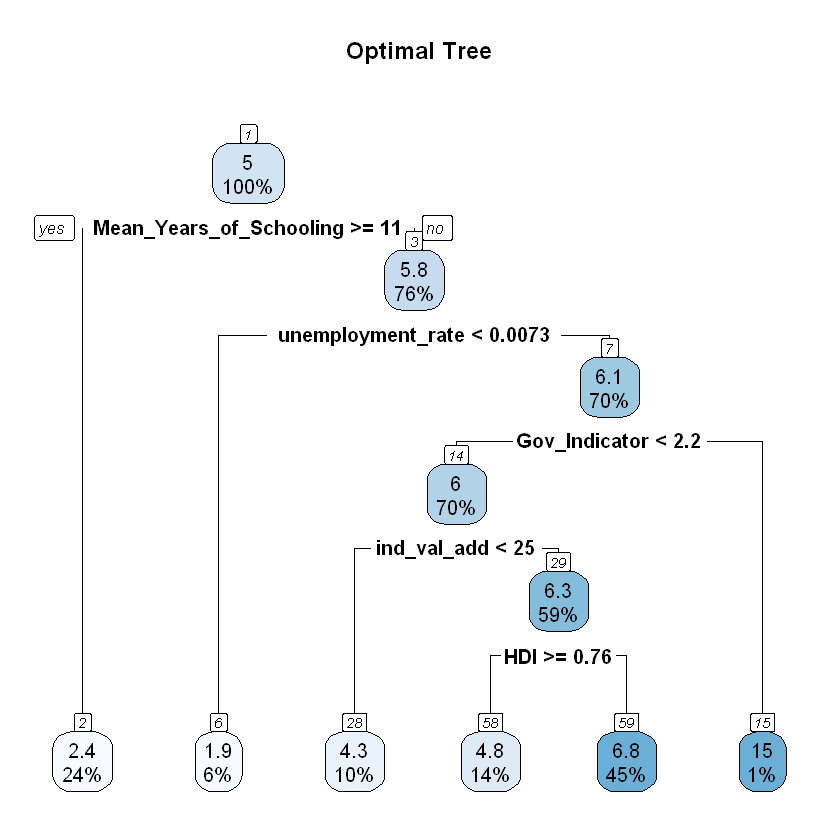

In [104]:
# Prune the tree to optimal
optcartasia <- prune(cartmaxasia, cp = cp.opt)
rpart.plot(optcartasia, nn= T, main = "Optimal Tree")

In [105]:
# Variable Importance
optcartasia$variable.importance
scaled_variable_importance = round((100*optcartasia$variable.importance/sum(optcartasia$variable.importance)))
scaled_variable_importance

Gov_Indicator           Mean_Years_of_Schooling 
                        251.30898                         246.25953 
                  Child_Mortality                               GNI 
                        245.86877                         209.10970 
                      Market_Size                          Life_Exp 
                        209.10970                         179.48206 
                unemployment_rate                               HDI 
                         95.99386                          58.37685 
                      ind_val_add                         inflation 
                         38.32231                          31.99795 
                    Pol_Stability                               BoT 
                         27.87077                          26.66488 
                   Trade_Openness Domestic_credit_to_private_sector 
                         20.90308                          10.45154

Gov_Indicator           Mean_Years_of_Schooling 
                               15                                15 
                  Child_Mortality                               GNI 
                               15                                13 
                      Market_Size                          Life_Exp 
                               13                                11 
                unemployment_rate                               HDI 
                                6                                 4 
                      ind_val_add                         inflation 
                                2                                 2 
                    Pol_Stability                               BoT 
                                2                                 2 
                   Trade_Openness Domestic_credit_to_private_sector 
                                1                                 1

In [106]:
# Checking Accuracy 
cart.predicttest <- predict(optcartasia, newdata = testsetasia)
cart.predicttrain <- predict(optcartasia, newdata = trainsetasia)

rmse(cart.predicttrain, trainsetasia$GDP_Growth) #1.130805
rmse(cart.predicttest, testsetasia$GDP_Growth) #1.838918

[1] 1.130805

[1] 1.838918

# CART with no NA values

In [107]:
asia_dataset_cleaned_na <- fread('final_asia_dataset_cleaned.csv')

summary(asia_dataset_cleaned_na)

  Countries              Year        GDP_Growth       Market_Size    
 Length:150         Min.   :2010   Min.   :-0.1154   Min.   :  2439  
 Class :character   1st Qu.:2012   1st Qu.: 3.3457   1st Qu.:  5313  
 Mode  :character   Median :2014   Median : 5.2443   Median : 11227  
                    Mean   :2014   Mean   : 5.0493   Mean   : 21163  
                    3rd Qu.:2017   3rd Qu.: 6.7503   3rd Qu.: 32917  
                    Max.   :2019   Max.   :14.5256   Max.   :102573  
                                                                     
    Life_Exp     Mean_Years_of_Schooling Internet_Penetration Gov_Indicator    
 Min.   :63.52   Min.   : 4.100          Min.   : 0.25        Min.   :-1.6733  
 1st Qu.:70.20   1st Qu.: 6.500          1st Qu.:14.90        1st Qu.:-0.5788  
 Median :75.09   Median : 8.100          Median :41.00        Median :-0.3735  
 Mean   :74.71   Mean   : 8.752          Mean   :45.26        Mean   : 0.1507  
 3rd Qu.:81.09   3rd Qu.:11.100         

In [108]:
#data exploration for NA values---------------

asia_dataset_cleaned_na[rowSums(is.na(asia_dataset_cleaned_na)) > 0,]
asia_dataset_cleaned_na[is.na(asia_dataset_cleaned_na$CPI)]
asia_dataset_cleaned_na <- subset(asia_dataset_cleaned_na, select = -c(CPI))
#drop CPI col


asia_dataset_cleaned_na[is.na(asia_dataset_cleaned_na$Internet_Penetration)]
asia_dataset_cleaned_na <- asia_dataset_cleaned_na[!is.na(asia_dataset_cleaned_na$Internet_Penetration)]
#drop rows with NA in Internet_Penetration 

asia_dataset_cleaned_na[is.na(asia_dataset_cleaned_na$Renew_Energy)]
asia_dataset_cleaned_na <- asia_dataset_cleaned_na[!is.na(asia_dataset_cleaned_na$Renew_Energy)]
#drop rows with NA in Renew_Energy

asia_dataset_cleaned_na[is.na(asia_dataset_cleaned_na$Domestic_credit_to_private_sector)]
asia_dataset_cleaned_na <- asia_dataset_cleaned_na[!is.na(asia_dataset_cleaned_na$Domestic_credit_to_private_sector)]
#drop rows with NA in Domestic_credit_to_private_sector

asia_dataset_cleaned_na[is.na(asia_dataset_cleaned_na$ind_val_add)]
asia_dataset_cleaned_na <- asia_dataset_cleaned_na[!is.na(asia_dataset_cleaned_na$ind_val_add)]
#drop rows with NA in ind_val_add

Countries,Year,GDP_Growth,Market_Size,Life_Exp,Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,...,BoT,Child_Mortality,HDI,Pol_Stability,CPI,Urban_pop,Renew_Energy,CO2_emissions,ind_val_add,unemployment_rate
Australia,2019,2.160956,52203.130,82.90000,12.7,NA,1.825413,24.110970,65.93,...,2.51,3.6,0.944,0.9117457,77,0.86124,54.399850,411015667,25.38245,0.0516
Australia,2018,2.949286,50252.840,82.74878,12.7,NA,1.805214,21.821900,65.65,...,0.38,3.7,0.943,0.9896040,77,0.86012,44.443000,415953947,24.15897,0.0530
Australia,2011,2.462756,41965.360,81.89512,12.7,79.48770,2.044710,21.436420,65.63,...,0.97,4.5,0.932,0.9357101,NA,0.85300,26.273000,404172757,26.43613,0.0508
Australia,2010,2.067417,39301.340,81.69512,12.6,76.00000,2.032045,19.810010,65.60,...,-1.03,4.8,0.930,0.8888599,NA,0.85182,21.720000,405502799,25.15142,0.0521
Bangladesh,2011,6.464379,2620.834,70.25600,5.7,4.50000,-1.087300,19.922070,56.85,...,-6.54,46.1,0.566,-1.4047370,NA,0.31225,0.979676,56556344,25.04530,0.0371
Bangladesh,2010,5.571788,2439.070,69.88100,5.3,3.70000,-1.057410,16.024110,56.92,...,-5.84,48.7,0.557,-1.4257890,NA,0.30462,0.836591,53991553,24.95648,0.0338
China,2011,9.550832,10299.870,74.70800,7.4,38.30000,-0.507090,26.568190,71.06,...,3.85,14.6,0.707,-0.6020548,NA,0.50511,766.200000,9388199234,46.52929,0.0450
China,2010,10.635870,9253.765,74.40900,7.3,34.30000,-0.561790,27.185330,71.26,...,5.03,15.8,0.699,-0.6570607,NA,0.49226,752.445000,8500542695,46.49783,0.0450
India,2011,5.241315,4493.669,67.13000,5.3,10.07000,-0.536260,24.540410,53.29,...,-5.42,55.1,0.588,-1.3267950,NA,0.31276,174.620800,1766065040,30.16168,0.0565
India,2010,8.497585,4236.744,66.69300,5.4,7.50000,-0.468240,22.400930,54.21,...,-5.75,58.2,0.579,-1.2779840,NA,0.30930,145.823900,1678478677,30.72508,0.0565


Countries,Year,GDP_Growth,Market_Size,Life_Exp,Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,...,BoT,Child_Mortality,HDI,Pol_Stability,CPI,Urban_pop,Renew_Energy,CO2_emissions,ind_val_add,unemployment_rate
Australia,2011,2.462756,41965.360,81.89512,12.7,79.48770,2.044710,21.436420,65.63,...,0.97,4.5,0.932,0.9357101,NA,0.85300,26.273000,404172757,26.43613,0.0508
Australia,2010,2.067417,39301.340,81.69512,12.6,76.00000,2.032045,19.810010,65.60,...,-1.03,4.8,0.930,0.8888599,NA,0.85182,21.720000,405502799,25.15142,0.0521
Bangladesh,2011,6.464379,2620.834,70.25600,5.7,4.50000,-1.087300,19.922070,56.85,...,-6.54,46.1,0.566,-1.4047370,NA,0.31225,0.979676,56556344,25.04530,0.0371
Bangladesh,2010,5.571788,2439.070,69.88100,5.3,3.70000,-1.057410,16.024110,56.92,...,-5.84,48.7,0.557,-1.4257890,NA,0.30462,0.836591,53991553,24.95648,0.0338
China,2011,9.550832,10299.870,74.70800,7.4,38.30000,-0.507090,26.568190,71.06,...,3.85,14.6,0.707,-0.6020548,NA,0.50511,766.200000,9388199234,46.52929,0.0450
China,2010,10.635870,9253.765,74.40900,7.3,34.30000,-0.561790,27.185330,71.26,...,5.03,15.8,0.699,-0.6570607,NA,0.49226,752.445000,8500542695,46.49783,0.0450
India,2011,5.241315,4493.669,67.13000,5.3,10.07000,-0.536260,24.540410,53.29,...,-5.42,55.1,0.588,-1.3267950,NA,0.31276,174.620800,1766065040,30.16168,0.0565
India,2010,8.497585,4236.744,66.69300,5.4,7.50000,-0.468240,22.400930,54.21,...,-5.75,58.2,0.579,-1.2779840,NA,0.30930,145.823900,1678478677,30.72508,0.0565
Indonesia,2011,6.169784,9095.742,69.54200,7.6,12.28000,-0.701850,26.327350,67.27,...,-0.54,32.6,0.673,-0.7701142,NA,0.50595,21.888000,508073307,43.91342,0.0515
Indonesia,2010,6.223854,8505.748,69.20500,7.4,10.92000,-0.751560,24.299030,67.19,...,-0.35,33.9,0.665,-0.8539162,NA,0.49914,26.738000,428174280,42.77587,0.0561


Countries,Year,GDP_Growth,Market_Size,Life_Exp,Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,...,GNI,BoT,Child_Mortality,HDI,Pol_Stability,Urban_pop,Renew_Energy,CO2_emissions,ind_val_add,unemployment_rate
Australia,2019,2.160956,52203.130,82.90000,12.7,NA,1.825413,24.11097,65.93,...,50540,2.51,3.6,0.944,0.9117457,0.86124,54.39985,411015667,25.38245,0.0516
Australia,2018,2.949286,50252.840,82.74878,12.7,NA,1.805214,21.82190,65.65,...,48660,0.38,3.7,0.943,0.9896040,0.86012,44.44300,415953947,24.15897,0.0530
Myanmar,2019,1.694424,5297.442,67.13400,5.0,NA,-0.614940,28.04156,60.41,...,5150,4.04,44.7,0.583,-1.3280670,0.30852,NA,26231575,35.89711,0.0050
Myanmar,2018,6.750460,5149.938,66.86700,5.0,NA,-0.580750,30.38975,62.44,...,5000,0.09,46.4,0.579,-1.2688530,0.30579,NA,26095603,37.96077,0.0087
Myanmar,2016,5.750065,4492.021,66.20500,4.9,NA,-0.621010,25.94273,63.85,...,4370,-9.14,49.9,0.563,-0.8046199,0.30082,NA,25468783,35.46916,0.0114
Myanmar,2015,6.992840,4416.547,65.81000,4.9,NA,-0.836280,22.97517,65.55,...,4280,-7.96,51.8,0.557,-1.1650670,0.29858,NA,22076366,33.91247,0.0077
New Zealand,2019,1.633933,45073.200,81.70732,12.8,NA,2.170174,26.98690,69.60,...,43950,-0.12,4.7,0.931,1.4113020,0.86615,35.76924,36540963,NA,0.0407
New Zealand,2018,3.205748,43930.880,81.85854,12.7,NA,2.174655,27.59250,70.01,...,42360,-0.31,4.9,0.928,1.5339050,0.86538,36.31900,35080341,20.41986,0.0430
Philippines,2018,6.341486,8720.607,71.09500,9.4,NA,-0.542230,30.21361,59.58,...,9650,-11.74,28.0,0.711,-1.0920620,0.46907,22.66000,138924391,30.56374,0.0234
Philippines,2017,6.930988,8120.869,70.95200,9.4,NA,-0.476550,29.55229,59.67,...,9020,-9.06,28.7,0.708,-1.1850800,0.46682,23.09200,134518537,30.12655,0.0255


Countries,Year,GDP_Growth,Market_Size,Life_Exp,Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,...,GNI,BoT,Child_Mortality,HDI,Pol_Stability,Urban_pop,Renew_Energy,CO2_emissions,ind_val_add,unemployment_rate
Myanmar,2017,6.404977,4739.915,66.558,5.0,23.62108,-0.56529,28.359710,62.19,...,4600,-5.73,48.1,0.572,-1.084839,0.30322,NA,23669759,36.74277,0.0156
Myanmar,2014,7.990916,4245.806,65.378,4.8,11.52000,-0.88217,20.090400,65.93,...,4080,-2.08,53.7,0.550,-1.087581,0.29650,NA,16169507,34.48971,0.0078
Myanmar,2013,8.426001,4016.316,64.921,4.7,8.00000,-0.99989,19.635100,66.34,...,3890,0.69,55.8,0.543,-1.140372,0.29457,NA,12936196,32.36222,0.0080
Myanmar,2012,7.332670,3727.142,64.453,4.5,4.00000,-1.06326,11.498360,66.75,...,3580,0.61,58.2,0.533,-0.943675,0.29266,NA,11891872,32.37302,0.0079
Myanmar,2011,5.591482,3469.139,63.983,4.3,0.98000,-1.58677,0.099465,67.12,...,3470,1.11,60.7,0.526,-1.111098,0.29075,NA,15067867,31.29165,0.0079
Myanmar,2010,9.634439,3243.000,63.525,4.1,0.25000,-1.67334,19.588650,67.42,...,3240,1.90,63.4,0.515,-1.285928,0.28885,NA,13083825,26.46806,0.0079


Countries,Year,GDP_Growth,Market_Size,Life_Exp,Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,...,GNI,BoT,Child_Mortality,HDI,Pol_Stability,Urban_pop,Renew_Energy,CO2_emissions,ind_val_add,unemployment_rate
New Zealand,2013,2.695784,36242.62,81.40732,12.1,82.78000,2.341601,28.81358,67.57,...,34810,1.61,5.8,0.914,1.453927,0.86221,31.530,35240937,20.28755,0.0577
New Zealand,2012,2.240641,32988.61,81.15610,12.1,81.64447,2.315760,28.85939,67.33,...,31620,0.70,5.9,0.911,1.361366,0.86161,31.223,36000433,20.92336,0.0693
New Zealand,2011,2.256737,32701.38,80.90488,12.0,81.23000,2.297591,30.39502,67.52,...,31220,1.55,6.0,0.909,1.376731,0.86100,33.233,34249571,20.99472,0.0649
New Zealand,2010,1.527994,31239.19,80.70244,12.0,80.46000,2.338579,30.27363,67.21,...,29690,2.30,6.1,0.906,1.236489,0.86160,32.285,34957784,21.17565,0.0656


Countries,Year,GDP_Growth,Market_Size,Life_Exp,Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,...,GNI,BoT,Child_Mortality,HDI,Pol_Stability,Urban_pop,Renew_Energy,CO2_emissions,ind_val_add,unemployment_rate
Japan,2019,0.270309,42197.25,84.35634,12.8,92.7304,1.4672,17.55011,62.36,...,43760,0.17,2.5,0.919,1.031847,0.91698,225.5377,1106664426,NA,0.024


In [109]:
summary(asia_dataset_cleaned_na)

  Countries              Year        GDP_Growth       Market_Size    
 Length:122         Min.   :2010   Min.   :-0.1154   Min.   :  2439  
 Class :character   1st Qu.:2012   1st Qu.: 3.5248   1st Qu.:  5656  
 Mode  :character   Median :2014   Median : 5.0807   Median : 12268  
                    Mean   :2014   Mean   : 4.9984   Mean   : 22031  
                    3rd Qu.:2017   3rd Qu.: 6.5301   3rd Qu.: 33631  
                    Max.   :2019   Max.   :14.5256   Max.   :102573  
    Life_Exp     Mean_Years_of_Schooling Internet_Penetration Gov_Indicator    
 Min.   :65.26   Min.   : 4.700          Min.   : 3.70        Min.   :-1.0877  
 1st Qu.:70.51   1st Qu.: 7.300          1st Qu.:15.16        1st Qu.:-0.5626  
 Median :75.14   Median : 7.950          Median :41.65        Median :-0.3481  
 Mean   :75.06   Mean   : 8.719          Mean   :45.51        Mean   : 0.1390  
 3rd Qu.:80.34   3rd Qu.:10.975          3rd Qu.:77.66        3rd Qu.: 1.1718  
 Max.   :84.21   Max.   :12.80

In [110]:
# Train-Test split-----------------------------
set.seed(2014)

trainasiana <- sample.split(Y = asia_dataset_cleaned_na$GDP_Growth, SplitRatio = 0.70)

trainsetasiana <- subset(asia_dataset_cleaned_na, trainasiana == T)

testsetasiana <- subset(asia_dataset_cleaned_na, trainasiana == F)

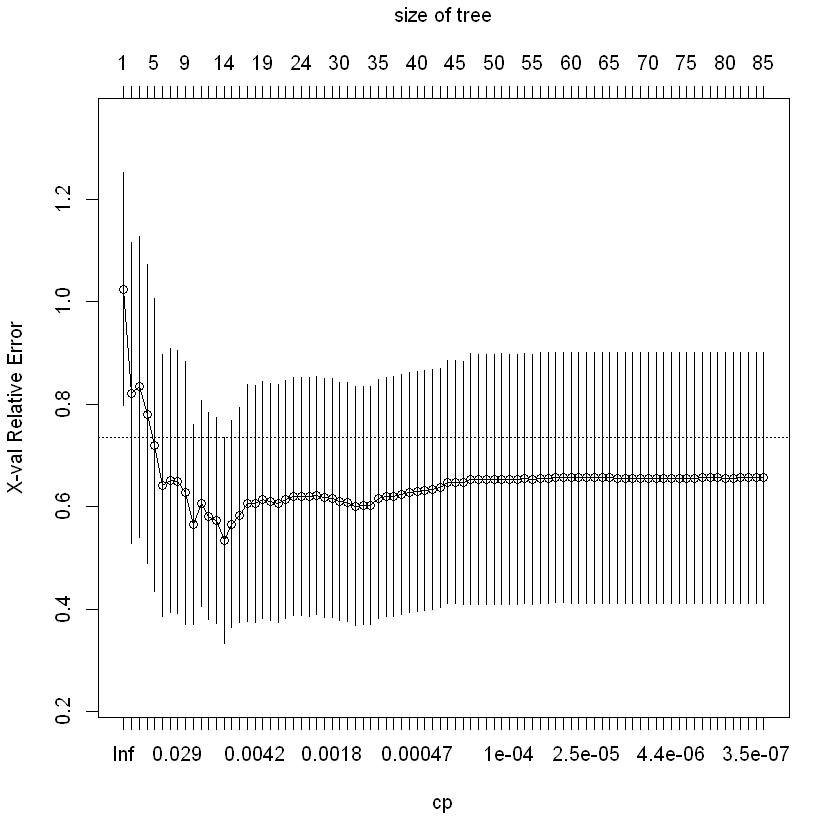

In [111]:
cartmaxasiana <- rpart(GDP_Growth ~ .-Countries - Year, data = trainsetasiana, method = 'anova',
                     control = rpart.control(minsplit = 2, cp = 0))

plotcp(cartmaxasiana)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

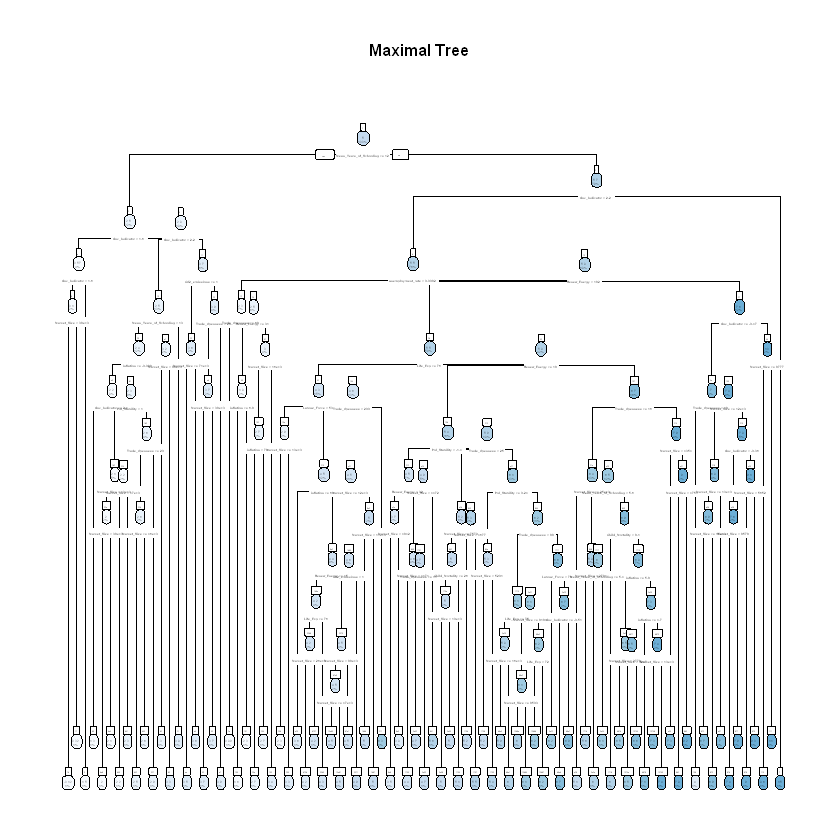

In [112]:
#Grow to max tree
rpart.plot(cartmaxasiana, nn= T, main = "Maximal Tree")


In [113]:
# Automatic method to find optimal CP 
CVerror.capna <- cartmaxasiana$cptable[which.min(cartmaxasiana$cptable[,"xerror"]), "xerror"] + cartmaxasiana$cptable[which.min(cartmaxasiana$cptable[,"xerror"]), "xstd"]

# Find the optimal CP region whose CV error is just below CVerror.cap in maximal tree m1.
i <- 1; j<- 4
while (cartmaxasiana$cptable[i,j] > CVerror.capna) {
  i <- i + 1
}

# Get geometric mean of the two identified CP values in the optimal region if optimal tree has at least one split.
cp.optna = ifelse(i > 1, sqrt(cartmaxasiana$cptable[i,1] * cartmaxasiana$cptable[i-1,1]), 1)
cp.optna

[1] 0.06478908

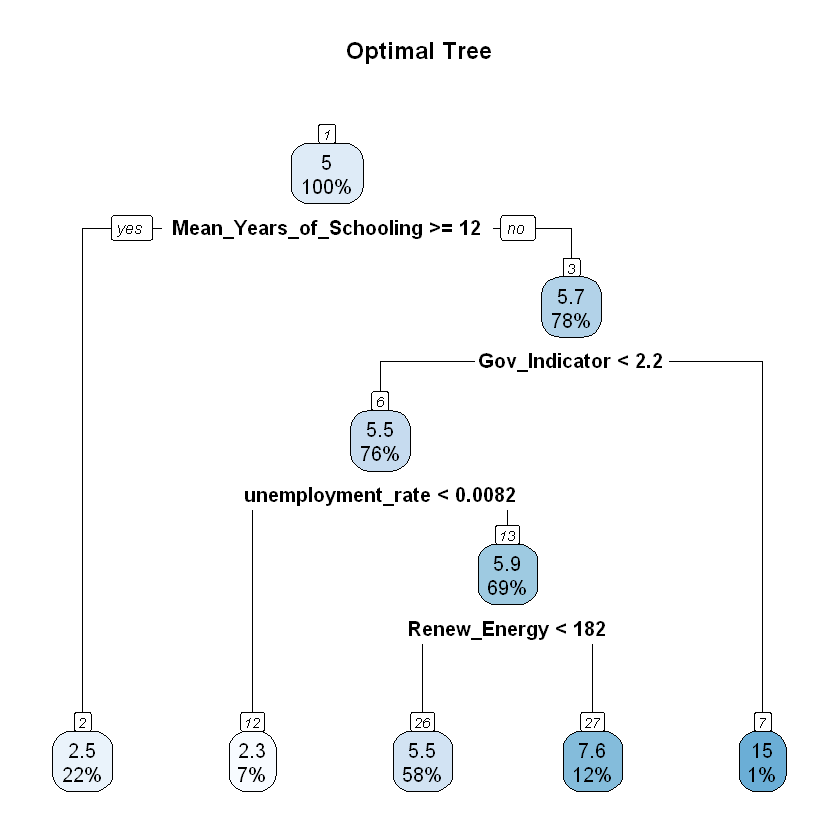

In [114]:
# Prune the tree to optimal
optcartasiana <- prune(cartmaxasiana, cp = cp.optna)
rpart.plot(optcartasiana, nn= T, main = "Optimal Tree")

In [115]:
# Variable Importance
optcartasiana$variable.importance
scaled_variable_importance = round((100*optcartasiana$variable.importance/sum(optcartasiana$variable.importance)))
scaled_variable_importance

Mean_Years_of_Schooling                               HDI 
                       156.083373                        129.589784 
                         Life_Exp              Internet_Penetration 
                       121.982411                        106.503228 
                      Market_Size                     Pol_Stability 
                       106.503228                        106.503228 
                    Gov_Indicator                 unemployment_rate 
                        91.326587                         84.442366 
                    CO2_emissions                      Renew_Energy 
                        37.956746                         37.956746 
                  Child_Mortality                      Labour_Force 
                        23.086556                         15.182698 
                      ind_val_add Domestic_credit_to_private_sector 
                        11.387024                          7.591349

Mean_Years_of_Schooling                               HDI 
                               15                                13 
                         Life_Exp              Internet_Penetration 
                               12                                10 
                      Market_Size                     Pol_Stability 
                               10                                10 
                    Gov_Indicator                 unemployment_rate 
                                9                                 8 
                    CO2_emissions                      Renew_Energy 
                                4                                 4 
                  Child_Mortality                      Labour_Force 
                                2                                 1 
                      ind_val_add Domestic_credit_to_private_sector 
                                1                                 1

In [116]:
# Checking Accuracy 
cart.predicttestna <- predict(optcartasiana, newdata = testsetasiana)
cart.predicttrainna <- predict(optcartasiana, newdata = trainsetasiana)

rmse(cart.predicttrainna, trainsetasiana$GDP_Growth)#1.237377
rmse(cart.predicttestna, testsetasiana$GDP_Growth)#1.803028

[1] 1.237377

[1] 1.803028

# CART with variables < 10 NA Values

In [117]:
asia_dataset_cleaned10 <- fread('final_asia_dataset_cleaned.csv')

summary(asia_dataset_cleaned10)

  Countries              Year        GDP_Growth       Market_Size    
 Length:150         Min.   :2010   Min.   :-0.1154   Min.   :  2439  
 Class :character   1st Qu.:2012   1st Qu.: 3.3457   1st Qu.:  5313  
 Mode  :character   Median :2014   Median : 5.2443   Median : 11227  
                    Mean   :2014   Mean   : 5.0493   Mean   : 21163  
                    3rd Qu.:2017   3rd Qu.: 6.7503   3rd Qu.: 32917  
                    Max.   :2019   Max.   :14.5256   Max.   :102573  
                                                                     
    Life_Exp     Mean_Years_of_Schooling Internet_Penetration Gov_Indicator    
 Min.   :63.52   Min.   : 4.100          Min.   : 0.25        Min.   :-1.6733  
 1st Qu.:70.20   1st Qu.: 6.500          1st Qu.:14.90        1st Qu.:-0.5788  
 Median :75.09   Median : 8.100          Median :41.00        Median :-0.3735  
 Mean   :74.71   Mean   : 8.752          Mean   :45.26        Mean   : 0.1507  
 3rd Qu.:81.09   3rd Qu.:11.100         

In [118]:
#data exploration for NA values---------------

asia_dataset_cleaned10[rowSums(is.na(asia_dataset_cleaned10)) > 0,]
asia_dataset_cleaned10[is.na(asia_dataset_cleaned10$CPI)]
asia_dataset_cleaned10 <- subset(asia_dataset_cleaned10, select = -c(CPI))
#drop CPI col as it has 30 NAs


asia_dataset_cleaned10[is.na(asia_dataset_cleaned10$Internet_Penetration)]
asia_dataset_cleaned10 <- asia_dataset_cleaned10[!is.na(asia_dataset_cleaned10$Internet_Penetration)]
#drop rows with NA in Internet_Penetration as it has 17

Countries,Year,GDP_Growth,Market_Size,Life_Exp,Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,...,BoT,Child_Mortality,HDI,Pol_Stability,CPI,Urban_pop,Renew_Energy,CO2_emissions,ind_val_add,unemployment_rate
Australia,2019,2.160956,52203.130,82.90000,12.7,NA,1.825413,24.110970,65.93,...,2.51,3.6,0.944,0.9117457,77,0.86124,54.399850,411015667,25.38245,0.0516
Australia,2018,2.949286,50252.840,82.74878,12.7,NA,1.805214,21.821900,65.65,...,0.38,3.7,0.943,0.9896040,77,0.86012,44.443000,415953947,24.15897,0.0530
Australia,2011,2.462756,41965.360,81.89512,12.7,79.48770,2.044710,21.436420,65.63,...,0.97,4.5,0.932,0.9357101,NA,0.85300,26.273000,404172757,26.43613,0.0508
Australia,2010,2.067417,39301.340,81.69512,12.6,76.00000,2.032045,19.810010,65.60,...,-1.03,4.8,0.930,0.8888599,NA,0.85182,21.720000,405502799,25.15142,0.0521
Bangladesh,2011,6.464379,2620.834,70.25600,5.7,4.50000,-1.087300,19.922070,56.85,...,-6.54,46.1,0.566,-1.4047370,NA,0.31225,0.979676,56556344,25.04530,0.0371
Bangladesh,2010,5.571788,2439.070,69.88100,5.3,3.70000,-1.057410,16.024110,56.92,...,-5.84,48.7,0.557,-1.4257890,NA,0.30462,0.836591,53991553,24.95648,0.0338
China,2011,9.550832,10299.870,74.70800,7.4,38.30000,-0.507090,26.568190,71.06,...,3.85,14.6,0.707,-0.6020548,NA,0.50511,766.200000,9388199234,46.52929,0.0450
China,2010,10.635870,9253.765,74.40900,7.3,34.30000,-0.561790,27.185330,71.26,...,5.03,15.8,0.699,-0.6570607,NA,0.49226,752.445000,8500542695,46.49783,0.0450
India,2011,5.241315,4493.669,67.13000,5.3,10.07000,-0.536260,24.540410,53.29,...,-5.42,55.1,0.588,-1.3267950,NA,0.31276,174.620800,1766065040,30.16168,0.0565
India,2010,8.497585,4236.744,66.69300,5.4,7.50000,-0.468240,22.400930,54.21,...,-5.75,58.2,0.579,-1.2779840,NA,0.30930,145.823900,1678478677,30.72508,0.0565


Countries,Year,GDP_Growth,Market_Size,Life_Exp,Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,...,BoT,Child_Mortality,HDI,Pol_Stability,CPI,Urban_pop,Renew_Energy,CO2_emissions,ind_val_add,unemployment_rate
Australia,2011,2.462756,41965.360,81.89512,12.7,79.48770,2.044710,21.436420,65.63,...,0.97,4.5,0.932,0.9357101,NA,0.85300,26.273000,404172757,26.43613,0.0508
Australia,2010,2.067417,39301.340,81.69512,12.6,76.00000,2.032045,19.810010,65.60,...,-1.03,4.8,0.930,0.8888599,NA,0.85182,21.720000,405502799,25.15142,0.0521
Bangladesh,2011,6.464379,2620.834,70.25600,5.7,4.50000,-1.087300,19.922070,56.85,...,-6.54,46.1,0.566,-1.4047370,NA,0.31225,0.979676,56556344,25.04530,0.0371
Bangladesh,2010,5.571788,2439.070,69.88100,5.3,3.70000,-1.057410,16.024110,56.92,...,-5.84,48.7,0.557,-1.4257890,NA,0.30462,0.836591,53991553,24.95648,0.0338
China,2011,9.550832,10299.870,74.70800,7.4,38.30000,-0.507090,26.568190,71.06,...,3.85,14.6,0.707,-0.6020548,NA,0.50511,766.200000,9388199234,46.52929,0.0450
China,2010,10.635870,9253.765,74.40900,7.3,34.30000,-0.561790,27.185330,71.26,...,5.03,15.8,0.699,-0.6570607,NA,0.49226,752.445000,8500542695,46.49783,0.0450
India,2011,5.241315,4493.669,67.13000,5.3,10.07000,-0.536260,24.540410,53.29,...,-5.42,55.1,0.588,-1.3267950,NA,0.31276,174.620800,1766065040,30.16168,0.0565
India,2010,8.497585,4236.744,66.69300,5.4,7.50000,-0.468240,22.400930,54.21,...,-5.75,58.2,0.579,-1.2779840,NA,0.30930,145.823900,1678478677,30.72508,0.0565
Indonesia,2011,6.169784,9095.742,69.54200,7.6,12.28000,-0.701850,26.327350,67.27,...,-0.54,32.6,0.673,-0.7701142,NA,0.50595,21.888000,508073307,43.91342,0.0515
Indonesia,2010,6.223854,8505.748,69.20500,7.4,10.92000,-0.751560,24.299030,67.19,...,-0.35,33.9,0.665,-0.8539162,NA,0.49914,26.738000,428174280,42.77587,0.0561


Countries,Year,GDP_Growth,Market_Size,Life_Exp,Mean_Years_of_Schooling,Internet_Penetration,Gov_Indicator,Trade_Openness,Labour_Force,...,GNI,BoT,Child_Mortality,HDI,Pol_Stability,Urban_pop,Renew_Energy,CO2_emissions,ind_val_add,unemployment_rate
Australia,2019,2.160956,52203.130,82.90000,12.7,NA,1.825413,24.11097,65.93,...,50540,2.51,3.6,0.944,0.9117457,0.86124,54.39985,411015667,25.38245,0.0516
Australia,2018,2.949286,50252.840,82.74878,12.7,NA,1.805214,21.82190,65.65,...,48660,0.38,3.7,0.943,0.9896040,0.86012,44.44300,415953947,24.15897,0.0530
Myanmar,2019,1.694424,5297.442,67.13400,5.0,NA,-0.614940,28.04156,60.41,...,5150,4.04,44.7,0.583,-1.3280670,0.30852,NA,26231575,35.89711,0.0050
Myanmar,2018,6.750460,5149.938,66.86700,5.0,NA,-0.580750,30.38975,62.44,...,5000,0.09,46.4,0.579,-1.2688530,0.30579,NA,26095603,37.96077,0.0087
Myanmar,2016,5.750065,4492.021,66.20500,4.9,NA,-0.621010,25.94273,63.85,...,4370,-9.14,49.9,0.563,-0.8046199,0.30082,NA,25468783,35.46916,0.0114
Myanmar,2015,6.992840,4416.547,65.81000,4.9,NA,-0.836280,22.97517,65.55,...,4280,-7.96,51.8,0.557,-1.1650670,0.29858,NA,22076366,33.91247,0.0077
New Zealand,2019,1.633933,45073.200,81.70732,12.8,NA,2.170174,26.98690,69.60,...,43950,-0.12,4.7,0.931,1.4113020,0.86615,35.76924,36540963,NA,0.0407
New Zealand,2018,3.205748,43930.880,81.85854,12.7,NA,2.174655,27.59250,70.01,...,42360,-0.31,4.9,0.928,1.5339050,0.86538,36.31900,35080341,20.41986,0.0430
Philippines,2018,6.341486,8720.607,71.09500,9.4,NA,-0.542230,30.21361,59.58,...,9650,-11.74,28.0,0.711,-1.0920620,0.46907,22.66000,138924391,30.56374,0.0234
Philippines,2017,6.930988,8120.869,70.95200,9.4,NA,-0.476550,29.55229,59.67,...,9020,-9.06,28.7,0.708,-1.1850800,0.46682,23.09200,134518537,30.12655,0.0255


In [119]:
summary(asia_dataset_cleaned10)

  Countries              Year        GDP_Growth       Market_Size    
 Length:133         Min.   :2010   Min.   :-0.1154   Min.   :  2439  
 Class :character   1st Qu.:2012   1st Qu.: 3.4352   1st Qu.:  5234  
 Mode  :character   Median :2014   Median : 5.0915   Median : 12224  
                    Mean   :2014   Mean   : 4.9938   Mean   : 21704  
                    3rd Qu.:2017   3rd Qu.: 6.5526   3rd Qu.: 32989  
                    Max.   :2019   Max.   :14.5256   Max.   :102573  
                                                                     
    Life_Exp     Mean_Years_of_Schooling Internet_Penetration Gov_Indicator    
 Min.   :63.52   Min.   : 4.100          Min.   : 0.25        Min.   :-1.6733  
 1st Qu.:70.18   1st Qu.: 6.500          1st Qu.:14.90        1st Qu.:-0.5843  
 Median :75.11   Median : 7.900          Median :41.00        Median :-0.3520  
 Mean   :74.85   Mean   : 8.662          Mean   :45.26        Mean   : 0.1575  
 3rd Qu.:81.16   3rd Qu.:11.100         

In [120]:
# Train-Test split 
set.seed(2014)

trainasia10 <- sample.split(Y = asia_dataset_cleaned10$GDP_Growth, SplitRatio = 0.7)

trainsetasia10 <- subset(asia_dataset_cleaned10, trainasia10 == T)
testsetasia10 <- subset(asia_dataset_cleaned10, trainasia10 == F)

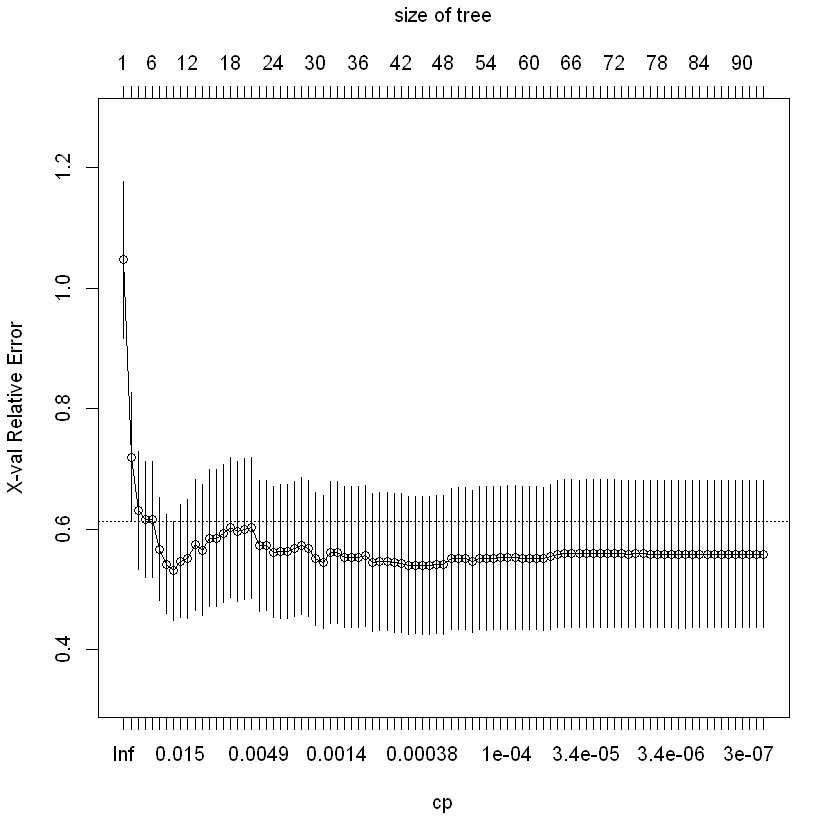

In [121]:
cartmaxasia10 <- rpart(GDP_Growth ~ .-Countries - Year, data = trainsetasia10, method = 'anova',
                     control = rpart.control(minsplit = 2, cp = 0))
plotcp(cartmaxasia10)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

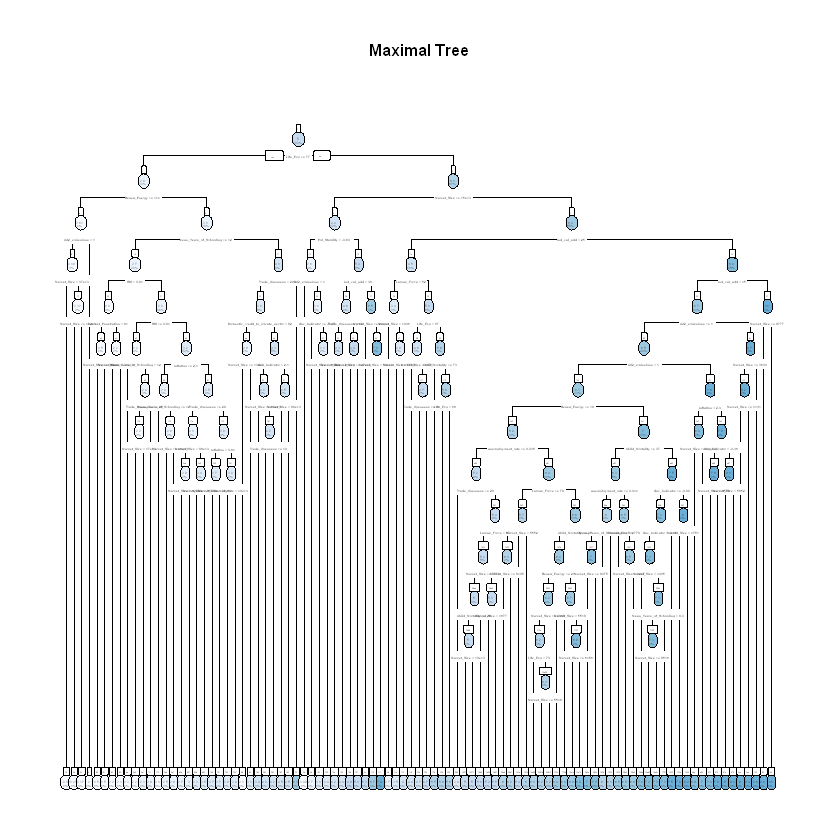

In [122]:
#Grow to max tree
rpart.plot(cartmaxasia10, nn= T, main = "Maximal Tree")

In [123]:
# Automatic method to find optimal CP 
CVerror.cap10 <- cartmaxasia10$cptable[which.min(cartmaxasia10$cptable[,"xerror"]), "xerror"] + cartmaxasia10$cptable[which.min(cartmaxasia10$cptable[,"xerror"]), "xstd"]

# Find the optimal CP region whose CV error is just below CVerror.cap in maximal tree m1.
i <- 1; j<- 4
while (cartmaxasia10$cptable[i,j] > CVerror.cap10) {
  i <- i + 1
}

# Get geometric mean of the two identified CP values in the optimal region if optimal tree has at least one split.
cp.opt10 = ifelse(i > 1, sqrt(cartmaxasia10$cptable[i,1] * cartmaxasia10$cptable[i-1,1]), 1)
cp.opt10

[1] 0.03457687

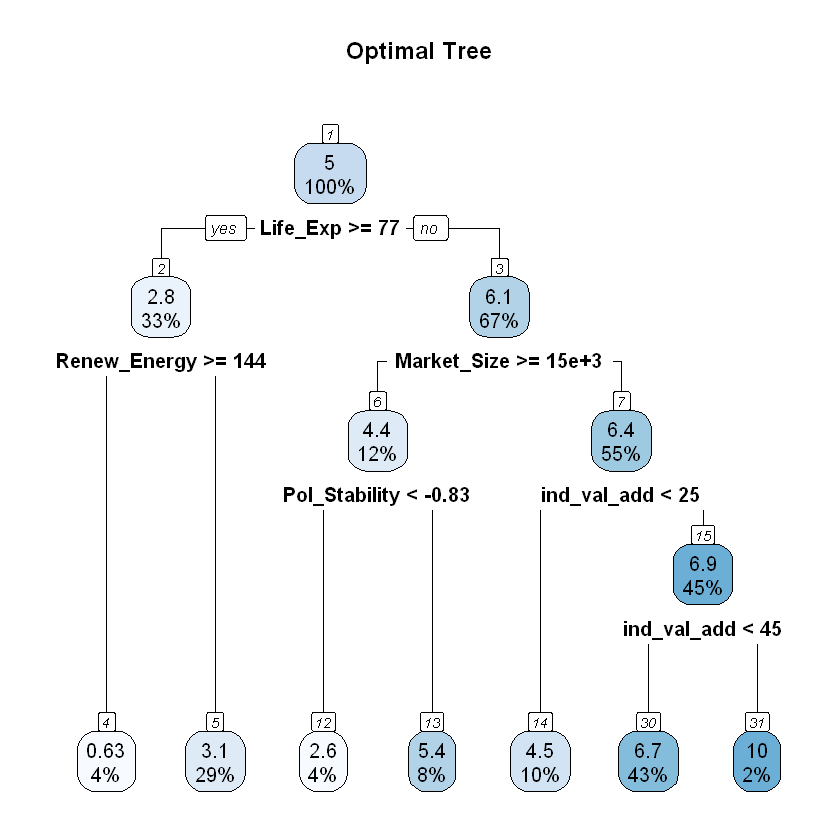

In [124]:
# Prune to Optimal
optcartasia10 <- prune(cartmaxasia10, cp = cp.opt10)
rpart.plot(optcartasia10, nn= T, main = "Optimal Tree")

In [125]:
# Variable Importance
optcartasia10$variable.importance
scaled_variable_importance = round((100*optcartasia10$variable.importance/sum(optcartasia10$variable.importance)))
scaled_variable_importance

Child_Mortality                     GNI             Market_Size 
              299.56815               240.02555               240.02555 
Mean_Years_of_Schooling                Life_Exp           Gov_Indicator 
              236.63940               233.73306               201.40077 
            ind_val_add                     HDI           Pol_Stability 
               62.24322                53.97827                52.17952 
         Trade_Openness    Internet_Penetration                     BoT 
               42.08029                31.60649                28.09075 
              inflation            Renew_Energy       unemployment_rate 
               28.09075                21.50726                20.85286 
              Urban_pop            Labour_Force           CO2_emissions 
               20.85286                17.90095                10.75363

Child_Mortality                     GNI             Market_Size 
                     16                      13                      13 
Mean_Years_of_Schooling                Life_Exp           Gov_Indicator 
                     13                      13                      11 
            ind_val_add                     HDI           Pol_Stability 
                      3                       3                       3 
         Trade_Openness    Internet_Penetration                     BoT 
                      2                       2                       2 
              inflation            Renew_Energy       unemployment_rate 
                      2                       1                       1 
              Urban_pop            Labour_Force           CO2_emissions 
                      1                       1                       1

In [126]:
# Checking Accuracy 
cart.predicttest10 <- predict(optcartasia10, newdata = testsetasia10)
cart.predicttrain10 <- predict(optcartasia10, newdata=trainsetasia10)

rmse(cart.predicttrain10, trainsetasia10$GDP_Growth) #1.068747
rmse(cart.predicttest10, testsetasia10$GDP_Growth)#2.588977 


[1] 1.068747

[1] 2.588977

# CART with NAs replaced with mean

In [127]:
asia_dataset_cleaned_mean <- fread('final_asia_dataset_cleaned_mean.csv')

summary(asia_dataset_cleaned_mean)

  Countries              Year        GDP_Growth       Market_Size    
 Length:140         Min.   :2010   Min.   :-0.1154   Min.   :  2439  
 Class :character   1st Qu.:2012   1st Qu.: 3.2554   1st Qu.:  6163  
 Mode  :character   Median :2014   Median : 5.0514   Median : 12268  
                    Mean   :2014   Mean   : 4.9345   Mean   : 22369  
                    3rd Qu.:2017   3rd Qu.: 6.5379   3rd Qu.: 35892  
                    Max.   :2019   Max.   :14.5256   Max.   :102573  
    Life_Exp     Mean_Years_of_Schooling Internet_Penetration Gov_Indicator    
 Min.   :65.26   Min.   : 4.70           Min.   : 3.70        Min.   :-1.0877  
 1st Qu.:70.79   1st Qu.: 7.50           1st Qu.:17.12        1st Qu.:-0.5301  
 Median :75.32   Median : 8.60           Median :41.65        Median :-0.3436  
 Mean   :75.37   Mean   : 9.04           Mean   :46.80        Mean   : 0.2288  
 3rd Qu.:81.42   3rd Qu.:11.32           3rd Qu.:79.04        3rd Qu.: 1.5610  
 Max.   :84.36   Max.   :12.80

In [128]:
# Train-Test split-----------------------------
set.seed(2014)

trainasiamean <- sample.split(Y = asia_dataset_cleaned_mean$GDP_Growth, SplitRatio = 0.70)

trainsetasiamean <- subset(asia_dataset_cleaned_mean, trainasiamean == T)

testsetasiamean <- subset(asia_dataset_cleaned_mean, trainasiamean == F)

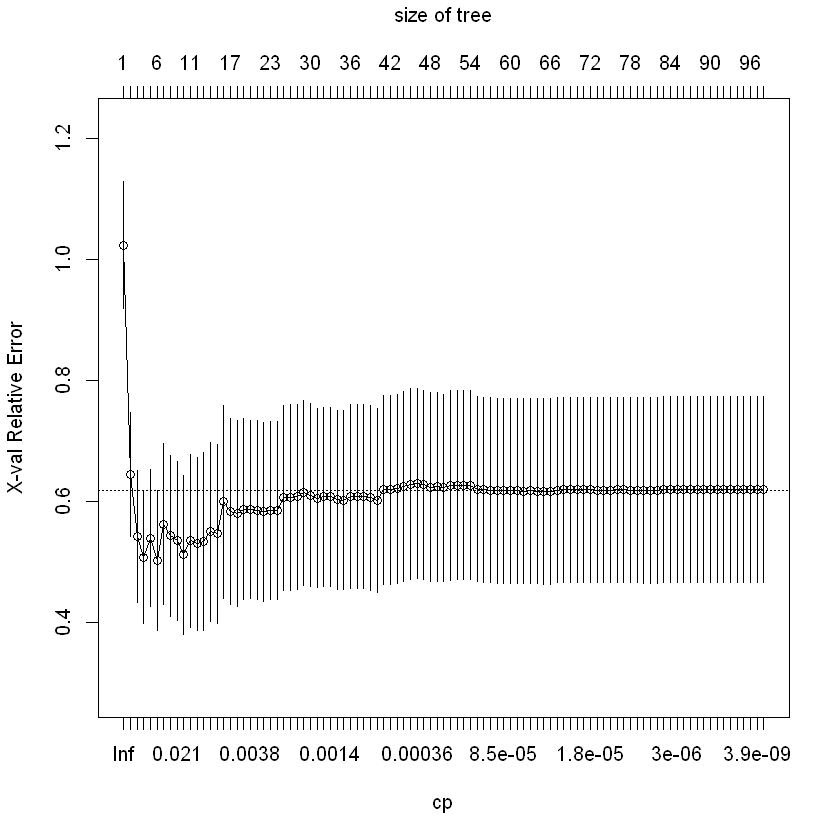

In [129]:
cartmaxasiamean <- rpart(GDP_Growth ~ .-Countries - Year, data = trainsetasiamean, method = 'anova',
                     control = rpart.control(minsplit = 2, cp = 0))

plotcp(cartmaxasiamean)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

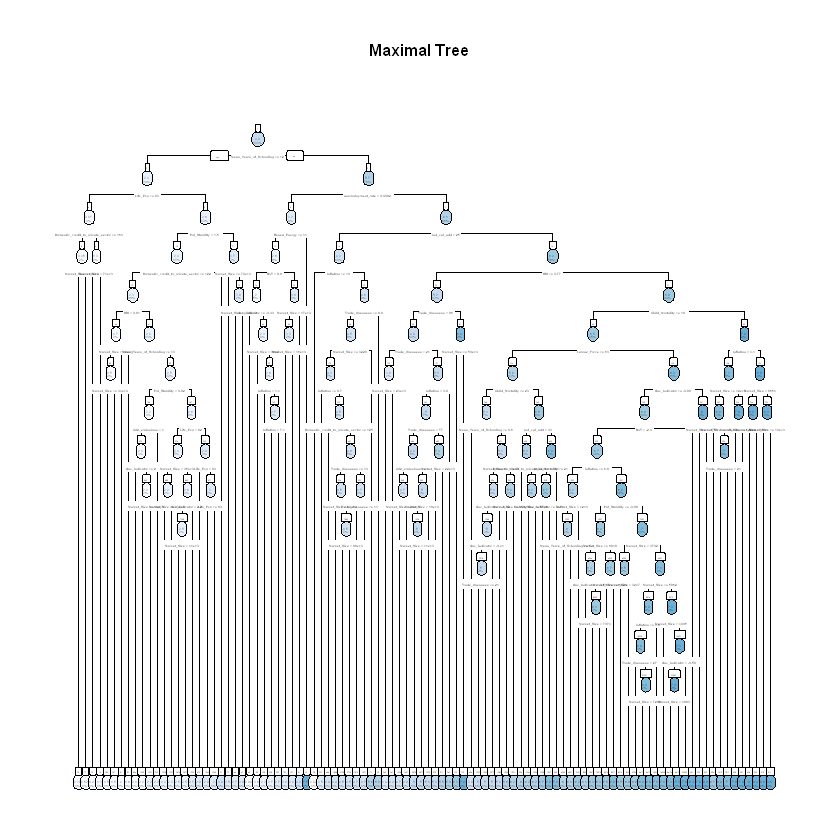

In [130]:
#Grow to max tree
rpart.plot(cartmaxasiamean, nn= T, main = "Maximal Tree")

In [131]:
# Automatic method to find optimal CP 
CVerror.capmean <- cartmaxasiamean$cptable[which.min(cartmaxasiamean$cptable[,"xerror"]), "xerror"] + cartmaxasiamean$cptable[which.min(cartmaxasiamean$cptable[,"xerror"]), "xstd"]

# Find the optimal CP region whose CV error is just below CVerror.cap in maximal tree m1.
i <- 1; j<- 4
while (cartmaxasiamean$cptable[i,j] > CVerror.capmean) {
  i <- i + 1
}

# Get geometric mean of the two identified CP values in the optimal region if optimal tree has at least one split.
cp.optmean = ifelse(i > 1, sqrt(cartmaxasiamean$cptable[i,1] * cartmaxasiamean$cptable[i-1,1]), 1)
cp.optmean

[1] 0.1091394

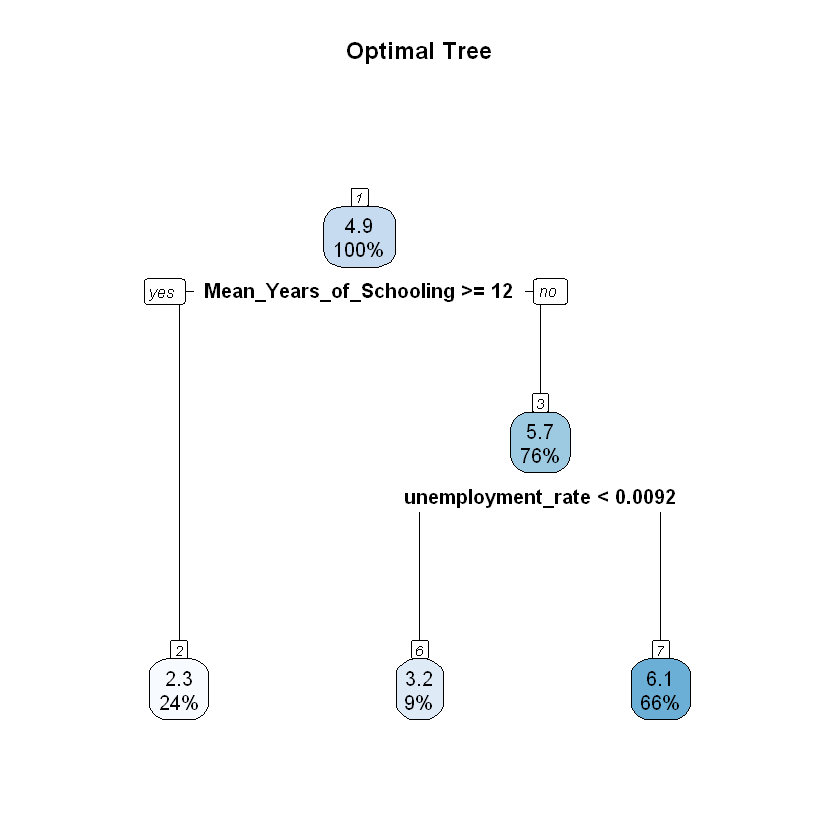

In [132]:
# Prune the tree to optimal
optcartasiamean <- prune(cartmaxasiamean, cp = cp.optmean)
rpart.plot(optcartasiamean, nn= T, main = "Optimal Tree")

In [133]:
# Variable Importance
optcartasiamean$variable.importance
scaled_variable_importance = round((100*optcartasiamean$variable.importance/sum(optcartasiamean$variable.importance)))
scaled_variable_importance

Mean_Years_of_Schooling                     HDI                Life_Exp 
              224.39539               195.84704               186.81333 
          Pol_Stability    Internet_Penetration             Market_Size 
              180.67410               171.64040               171.64040 
      unemployment_rate         Child_Mortality           Gov_Indicator 
               68.27821                15.17293                15.17293

Mean_Years_of_Schooling                     HDI                Life_Exp 
                     18                      16                      15 
          Pol_Stability    Internet_Penetration             Market_Size 
                     15                      14                      14 
      unemployment_rate         Child_Mortality           Gov_Indicator 
                      6                       1                       1

In [134]:
# Checking Accuracy 
cart.predicttestmean <- predict(optcartasiamean, newdata = testsetasiamean)
cart.predicttrainmean <- predict(optcartasiamean, newdata = trainsetasiamean)


rmse(cart.predicttrainmean, trainsetasiamean$GDP_Growth) #1.399542
rmse(cart.predicttestmean, testsetasiamean$GDP_Growth) #2.156966

[1] 1.399542

[1] 2.156966

# EIU Baseline Model

In [135]:
asia_dataset_cleaned_EIU <- fread('final_asia_dataset_cleaned.csv')
asia_dataset_cleaned_EIU <- asia_dataset_cleaned_EIU[, c(1:11)]

summary(asia_dataset_cleaned_EIU)

  Countries              Year        GDP_Growth       Market_Size    
 Length:150         Min.   :2010   Min.   :-0.1154   Min.   :  2439  
 Class :character   1st Qu.:2012   1st Qu.: 3.3457   1st Qu.:  5313  
 Mode  :character   Median :2014   Median : 5.2443   Median : 11227  
                    Mean   :2014   Mean   : 5.0493   Mean   : 21163  
                    3rd Qu.:2017   3rd Qu.: 6.7503   3rd Qu.: 32917  
                    Max.   :2019   Max.   :14.5256   Max.   :102573  
                                                                     
    Life_Exp     Mean_Years_of_Schooling Internet_Penetration Gov_Indicator    
 Min.   :63.52   Min.   : 4.100          Min.   : 0.25        Min.   :-1.6733  
 1st Qu.:70.20   1st Qu.: 6.500          1st Qu.:14.90        1st Qu.:-0.5788  
 Median :75.09   Median : 8.100          Median :41.00        Median :-0.3735  
 Mean   :74.71   Mean   : 8.752          Mean   :45.26        Mean   : 0.1507  
 3rd Qu.:81.09   3rd Qu.:11.100         

In [136]:
# Train-Test split-----------------------------
set.seed(2014)

trainasiaEIU <- sample.split(Y = asia_dataset_cleaned_EIU$GDP_Growth, SplitRatio = 0.70)

trainsetasiaEIU <- subset(asia_dataset_cleaned_EIU, trainasiaEIU == T)

testsetasiaEIU <- subset(asia_dataset_cleaned_EIU, trainasiaEIU == F)

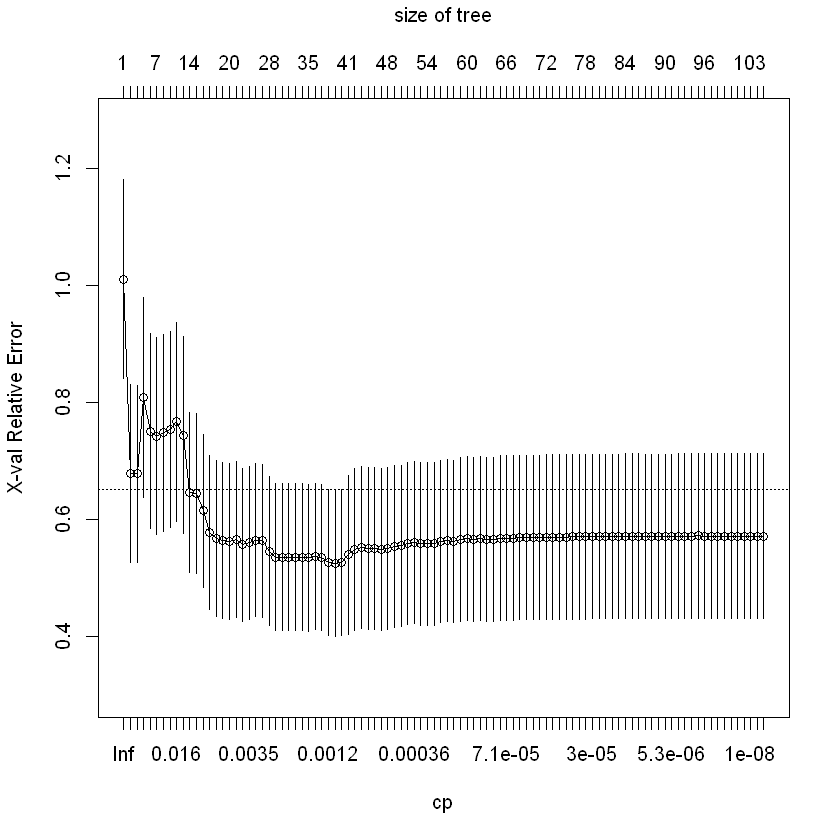

In [137]:
cartmaxasiaEIU <- rpart(GDP_Growth ~ .-Countries - Year, data = trainsetasiaEIU, method = 'anova',
                     control = rpart.control(minsplit = 2, cp = 0))

plotcp(cartmaxasiaEIU)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

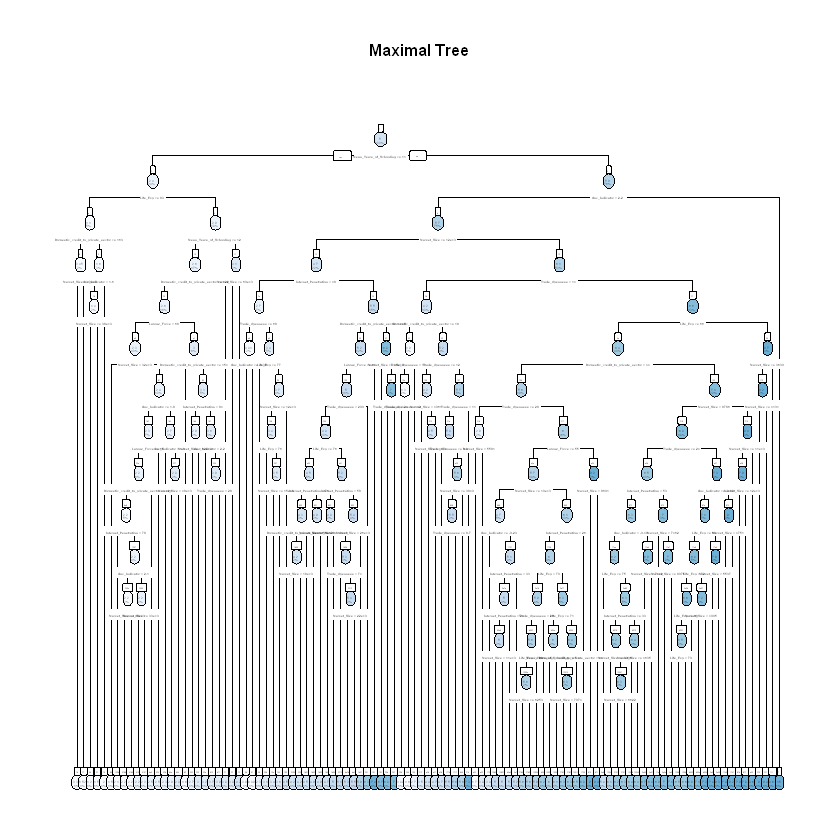

In [138]:
#Grow to max tree
rpart.plot(cartmaxasiaEIU, nn= T, main = "Maximal Tree")

In [139]:
# Automatic method to find optimal CP 
CVerror.capEIU <- cartmaxasiaEIU$cptable[which.min(cartmaxasiaEIU$cptable[,"xerror"]), "xerror"] + cartmaxasiaEIU$cptable[which.min(cartmaxasiaEIU$cptable[,"xerror"]), "xstd"]

# Find the optimal CP region whose CV error is just below CVerror.cap in maximal tree m1.
i <- 1; j<- 4
while (cartmaxasiaEIU$cptable[i,j] > CVerror.capEIU) {
  i <- i + 1
}

# Get geometric mean of the two identified CP values in the optimal region if optimal tree has at least one split.
cp.optEIU = ifelse(i > 1, sqrt(cartmaxasiaEIU$cptable[i,1] * cartmaxasiaEIU$cptable[i-1,1]), 1)
cp.optEIU

[1] 0.01143167

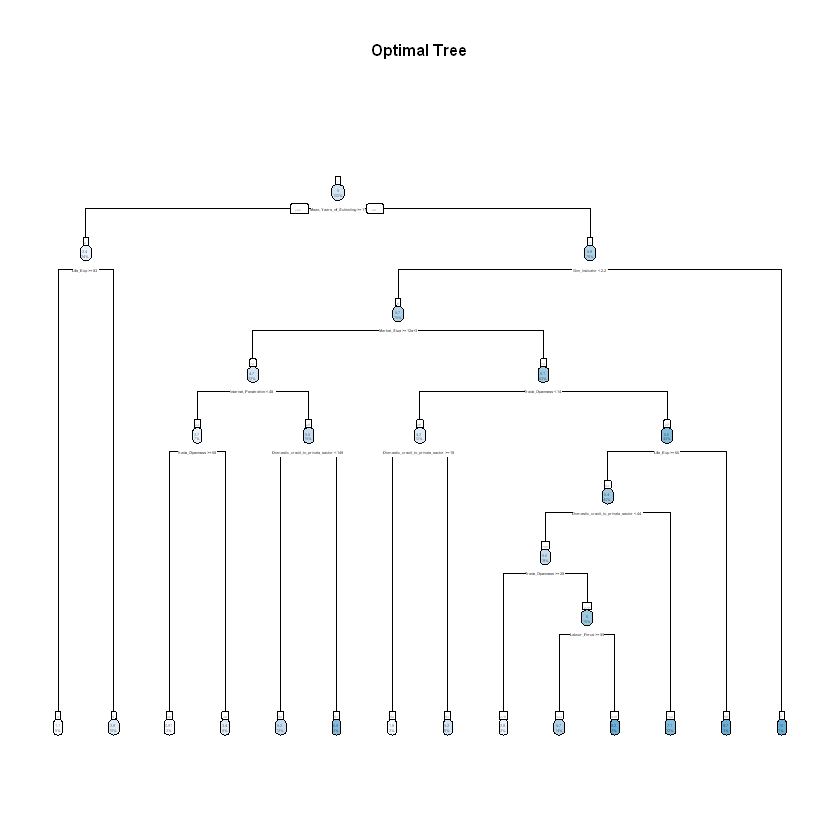

In [140]:
# Prune the tree to optimal
optcartasiaEIU <- prune(cartmaxasiaEIU, cp = cp.optEIU)
rpart.plot(optcartasiaEIU, nn= T, main = "Optimal Tree")

In [141]:
# Variable Importance
optcartasiaEIU$variable.importance
scaled_variable_importance = round((100*optcartasiaEIU$variable.importance/sum(optcartasiaEIU$variable.importance)))
scaled_variable_importance

Gov_Indicator           Mean_Years_of_Schooling 
                        334.98155                         293.97712 
                         Life_Exp                       Market_Size 
                        268.63622                         240.30349 
Domestic_credit_to_private_sector                    Trade_Openness 
                        177.78853                         123.98075 
             Internet_Penetration                      Labour_Force 
                        116.38074                          86.75027

Gov_Indicator           Mean_Years_of_Schooling 
                               20                                18 
                         Life_Exp                       Market_Size 
                               16                                15 
Domestic_credit_to_private_sector                    Trade_Openness 
                               11                                 8 
             Internet_Penetration                      Labour_Force 
                                7                                 5

In [142]:
# Checking Accuracy 
cart.predicttestEIU <- predict(optcartasiaEIU, newdata = testsetasiaEIU)
cart.predicttrainEIU <- predict(optcartasiaEIU, newdata = trainsetasiaEIU)


rmse(cart.predicttrainEIU, trainsetasiaEIU$GDP_Growth) #0.8067812
rmse(cart.predicttestEIU, testsetasiaEIU$GDP_Growth) #2.236214

[1] 0.8067812

[1] 2.236214